K Means Clustering from Scratch

CS Practical - K-Means:

- Step 1 - Pick K random points as cluster centers called centroids.
- Step 2 - Assign each x to the nearest cluster by calculating its distance to each centroid (start with Euclidean).
- Step 3 - Find the new cluster center by taking the average of the assigned points.
- Step 4 - Repeat Step 2 and 3 for a given number of iterations until none of the cluster assignments change.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
class KMeans:
    def __init__(self, x, clusters, iters):
        self.clusters = clusters
        self.iters = iters
        self.x = np.array(x)
    
    def normalize(x):
        return (x-np.mean(x))/x.std()

    
    def distance(self,x1,x2):
        assert x1.shape == x2.shape, f"shapes don't match {x1.shape} != {x2.shape} "
        return math.sqrt(sum([(x1[i]-x2[i])**2 for i in range(len(x1))]))
    
    def generate_random_points(self):
        return np.random.randn(self.clusters,self.x.shape[1])
    
    def get_labels(self):
        labels = []
        for i,point in enumerate(self.x): 
            min_dist = float('inf')
            best_cluster = None
            for ic, center in enumerate(self.centers):
                dist = self.distance(point,center)
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = ic
            labels.append(best_cluster)
        return np.array(labels)
    
    def set_centers(self,i):
        if i == 0: 
            return self.generate_random_points()
        centers = []
        for j in range(self.clusters):
            m = self.x[self.labels==j].mean(0)
            centers.append(m)
        return np.array(centers)
            
    def fit(self):
        for i in range(self.iters):
            self.centers = self.set_centers(i)
            self.labels = self.get_labels()        

In [4]:
x = np.random.randn(100,2)

k = KMeans(x,3,50)

k.fit()

k.labels

array([1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0,
       1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0,
       2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1])

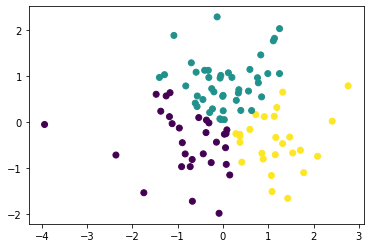

In [5]:
plt.scatter(x[:,0],x[:,1],c=k.labels)

# Bonus PCA

In [29]:
x = np.random.randn(100,10)
k = KMeans(x,3,50)
k.fit()
k.labels

array([1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 1,
       2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2])

In [30]:
def pca(x,k):
    """
    provide m x n matrix where m are examples and n are features 
    """
    x = x.T
    cov = np.cov(x)
    u,_,_ = np.linalg.svd(cov)
    u = u[:,:k]
    res = u.T@x
    return res.T

In [31]:
x_pca = pca(x,2)

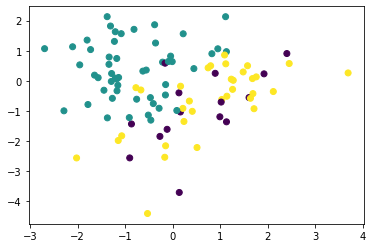

In [32]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=k.labels)